In [21]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix
plt.style.use("fivethirtyeight")
colors = ["Teal","Indigo","HotPink","DarkGoldenRod","Coral"]

Data is prepared as it has been provided by Bülent Esen's notebook https://www.kaggle.com/bulentesen/cardiac-arrythmia-naive-bayes-v2 who is the publisher of the dataset. No further data preparation besides the ones in cell 8 were not pursued since the data preparataion should be at it's best under the owner's own usage.

In [22]:
print(os.listdir('/'))

['$RECYCLE.BIN', 'apache-jmeter-5.5', 'Files', 'kali-linux-2022.3-installer-amd64.iso', 'Student-Management-System-in-Python-main', 'System Volume Information', 'Users', 'Windows10 x64(19045.2075).ISO', 'XuJiantao', '福昕高级PDF编辑器免安装已激活', '虚拟机VMware 15.5.0']


Data is a .CSV file which contains all the possible instructions that can be obtained from ECG readings. However some of the columns have unreliable data (nulls and just vectors of singular values to be exact). So the owner of the dataset seems to drop these columns not applying any interpolation implementation. So, this notebook doesn't follow any interpolation measure either.

In [23]:
df = pd.read_csv('data_arrhythmia.csv', delimiter=';')

In [24]:
# Get the list of columns with "?" values
cols_with_missing = [col for col in df.columns if df[col].isin(["?"]).any()]
# Print the column names
print("Columns with '?' values:", cols_with_missing)

# Find columns that contain only zeros
cols_with_all_zeros00 = [col for col in df.columns if (df[col] == 0.0).all()]
# Print the column names
print("Columns with all zeros:", cols_with_all_zeros00)

Columns with '?' values: ['T', 'P', 'QRST(ms)', 'J', 'heart_rate(bpm)']
Columns with all zeros: ["S'_wave(ms)", 'CB', 'CD', 'CS', 'EV', 'EY', 'FF', 'FH', 'FJ', 'FL', 'FS', 'FZ', 'GA', "S'_wave(mv)", 'IB', 'KP', 'LC']


In [25]:
columns_to_replace = ['T', 'P', 'QRST(ms)', 'J', 'heart_rate(bpm)']
for col in columns_to_replace:
    df[col].replace('?', -1, inplace=True)

In [26]:
# Find columns that contain only zeros
cols_with_all_zeros00 = [col for col in df.columns if (df[col] == 0.0).all()]
# Print the column names
print("Columns with all zeros:", cols_with_all_zeros00)

Columns with all zeros: ["S'_wave(ms)", 'CB', 'CD', 'CS', 'EV', 'EY', 'FF', 'FH', 'FJ', 'FL', 'FS', 'FZ', 'GA', "S'_wave(mv)", 'IB', 'KP', 'LC']


In [27]:
# Find columns that contain only zeros
cols_with_all_zeros0 = [col for col in df.columns if (df[col] == 0).all()]

# Print the column names
print("Columns with all zeros:", cols_with_all_zeros0)

Columns with all zeros: ["S'_wave(ms)", 'CB', 'CD', 'CS', 'EV', 'EY', 'FF', 'FH', 'FJ', 'FL', 'FS', 'FZ', 'GA', "S'_wave(mv)", 'IB', 'KP', 'LC']


In [28]:
# Get the column names with missing values
cols_with_missing_values = df.columns[df.isnull().any()].tolist()
# Print the column names
print(cols_with_missing_values)

[]


In [29]:
# 查找含有 '?' 的行
rows_with_question_marks = df[df.isin(['?']).any(axis=1)]

# 打印含有 '?' 的行
print(rows_with_question_marks)

Empty DataFrame
Columns: [age, sex, height, weight, qrs_duration(ms), p-r_interval(ms), q-t_interval, t_interval, p_interval, qrs, T, P, QRST(ms), J, heart_rate(bpm), q_wave(ms), r_wave(ms), s_wave(ms), R'_wave(ms), S'_wave(ms), AA, AB, AC, AD, AE, AF, AG, AH, AI, AJ, AK, AL, AM, AN, AO, AP, AR, AS, AT, AU, AV, AY, AZ, BA, BB, BC, BD, BE, BF, BG, BH, BI, BJ, BK, BL, BM, BN, BO, BP, BR, BS, BT, BU, BV, BY, BZ, CA, CB, CC, CD, CE, CF, CG, CH, CI, CJ, CK, CL, CM, CN, CO, CP, CR, CS, CT, CU, CV, CY, CZ, DA, DB, DC, DD, DE, DF, DG, DH, DI, DJ, DK, ...]
Index: []


In [30]:
pd.options.display.max_columns = 300
print(df.columns.values)
# 保存为记事本文件
with open("col_names.txt", "w") as file:
    file.write(str(df.columns.values))

['age' 'sex' 'height' 'weight' 'qrs_duration(ms)' 'p-r_interval(ms)'
 'q-t_interval' 't_interval' 'p_interval' 'qrs' 'T' 'P' 'QRST(ms)' 'J'
 'heart_rate(bpm)' 'q_wave(ms)' 'r_wave(ms)' 's_wave(ms)' "R'_wave(ms)"
 "S'_wave(ms)" 'AA' 'AB' 'AC' 'AD' 'AE' 'AF' 'AG' 'AH' 'AI' 'AJ' 'AK' 'AL'
 'AM' 'AN' 'AO' 'AP' 'AR' 'AS' 'AT' 'AU' 'AV' 'AY' 'AZ' 'BA' 'BB' 'BC'
 'BD' 'BE' 'BF' 'BG' 'BH' 'BI' 'BJ' 'BK' 'BL' 'BM' 'BN' 'BO' 'BP' 'BR'
 'BS' 'BT' 'BU' 'BV' 'BY' 'BZ' 'CA' 'CB' 'CC' 'CD' 'CE' 'CF' 'CG' 'CH'
 'CI' 'CJ' 'CK' 'CL' 'CM' 'CN' 'CO' 'CP' 'CR' 'CS' 'CT' 'CU' 'CV' 'CY'
 'CZ' 'DA' 'DB' 'DC' 'DD' 'DE' 'DF' 'DG' 'DH' 'DI' 'DJ' 'DK' 'DL' 'DM'
 'DN' 'DO' 'DP' 'DR' 'DS' 'DT' 'DU' 'DV' 'DY' 'DZ' 'EA' 'EB' 'EC' 'ED'
 'EF' 'EG' 'EH' 'EI' 'EJ' 'EK' 'EL' 'EM' 'EN' 'EO' 'EP' 'ER' 'ES' 'ET'
 'EU' 'EV' 'EY' 'EZ' 'FA' 'FB' 'FC' 'FD' 'FE' 'FF' 'FG' 'FH' 'FI' 'FJ'
 'FK' 'FL' 'FM' 'FN' 'FO' 'FP' 'FR' 'FS' 'FT' 'FU' 'FV' 'FY' 'FZ' 'GA'
 'GB' 'JJ_wave(mv)' 'Q_wave(mv)' 'R_wave(mv)' 'S_wave(mv)' "R'_wave(mv)"
 

In [31]:
df.head(452)

,age,sex,height,weight,qrs_duration(ms),p-r_interval(ms),q-t_interval,t_interval,p_interval,qrs,T,P,QRST(ms),J,heart_rate(bpm),q_wave(ms),r_wave(ms),s_wave(ms),R'_wave(ms),S'_wave(ms),AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM,AN,AO,AP,AR,AS,AT,AU,AV,AY,AZ,BA,BB,BC,BD,BE,BF,BG,BH,BI,BJ,BK,BL,BM,BN,BO,BP,BR,BS,BT,BU,BV,BY,BZ,CA,CB,CC,CD,CE,CF,CG,CH,CI,CJ,CK,CL,CM,CN,CO,CP,CR,CS,CT,CU,CV,CY,CZ,DA,DB,DC,DD,DE,DF,DG,DH,DI,DJ,DK,DL,DM,DN,DO,DP,DR,DS,DT,DU,DV,DY,DZ,EA,EB,EC,ED,EF,EG,EH,EI,EJ,EK,EL,EM,EN,EO,EP,ER,ES,ET,EU,EV,EY,EZ,FA,FB,FC,FD,FE,FF,FG,FH,FI,FJ,FK,FL,FM,FN,FO,FP,FR,FS,FT,FU,FV,FY,FZ,GA,GB,JJ_wave(mv),Q_wave(mv),R_wave(mv),S_wave(mv),R'_wave(mv),S'_wave(mv),P_wave(mv),T_wave(mv),QRSA(mvs),QRSTA(mvs),GM,GN,GO,GP,GR,GS,GT,GU,GV,GY,GZ,HA,HB,HC,HD,HE,HF,HG,HH,HI,HJ,HK,HL,HM,HN,HO,HP,HR,HS,HT,HU,HV,HY,HZ,IA,IB,IC,ID,IE,IF,IG,IH,II,IJ,IK,IL,IM,IN,IO,IP,IR,IS,IT,IU,IV,IY,IZ,JA,JB,JC,JD,JE,JF,JG,JH,JI,JJ,JK,JL,JM,JN,JO,JP,JR,JS,JT,JU,JV,JY,JZ,KA,KB,KC,KD,KE,KF,KG,KH,KI,KJ,KK,KL,KM,KN,KO,KP,KR,KS,KT,KU,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,-1,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,40,0,0,0,60,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,0,0,0,56,36,0,0,32,0,0,0,0,0,0,48,32,0,0,0,56,0,0,0,0,0,0,80,0,0,0,0,0,0,0,0,0,0,0,0,40,52,0,0,28,0,0,0,0,0,0,0,48,48,0,0,32,0,0,0,0,0,0,0,52,52,0,0,36,0,0,0,0,0,0,0,52,48,0,0,32,0,0,0,0,0,0,0,56,44,0,0,32,0,0,0,0,0,0,-0.2,0.0,6.1,-1.0,0.0,0,0.6,2.1,13.6,30.8,0.0,0.0,1.7,-1.0,0.6,0.0,1.3,1.5,3.7,14.5,0.1,-5.2,1.4,0.0,0.0,0.0,0.8,-0.6,-10.7,-15.6,0.4,-3.9,0.0,0.0,0.0,0.0,-0.8,-1.7,-10.1,-22.0,0.0,0.0,5.7,-1.0,0.0,0,-0.1,1.2,14.1,22.5,0.0,-2.5,0.8,0.0,0.0,0.0,1.0,0.4,-4.8,-2.7,0.1,-6.0,0.0,0.0,0.0,0.0,-0.8,-0.6,-24.0,-29.7,0.0,0.0,2.0,-6.4,0.0,0.0,0.2,2.9,-12.6,15.2,-0.1,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,-1,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,24,0,0,0,40,0,0,0,0,0,0,48,0,0,0,0,0,0,0,0,0,0,0,0,44,20,0,0,24,0,0,0,0,0,0,0,60,0,0,0,20,0,0,0,0,0,0,0,24,52,0,0,16,0,0,0,0,0,0,0,32,52,0,0,20,0,0,0,0,0,0,0,44,48,0,0,32,0,0,0,0,0,0,0,48,44,0,0,32,0,0,0,0,0,0,0,48,40,0,0,28,0,0,0,0,0,0,0,48,0,0,0,28,0,0,0,0,0,0,-0.6,0.0,7.2,0.0,0.0,0,0.4,1.5,17.2,26.5,0.0,0.0,5.5,0.0,0.0,0.0,0.1,1.7,17.6,29.5,0.3,-1.6,0.9,0.0,0.0,0.0,-0.3,0.4,-1.5,1.3,0.1,-6.4,0.0,0.0,0.0,0.0,-0.3,-1.6,-15.3,-25.5,-0.3,0.0,4.2,-0.9,0.0,0,0.4,0.7,8.3,12.3,0.2,0.0,2.2,0.0,0.0,0.0,-0.2,0.8,6.6,11.7,0.4,0.0,1.0,-8.8,0.0,0.0,0.5,-0.6,-21.6,-26.8,0.4,0.0,2.6,-7.9,0.0,0.0,0.8,2.0,-16.4,1.2,0.0,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,116,0,0,0,52,0,0,0,0,0,0,52,64,0,0,0,88,0,0,0,0,0,0,0,36,92,0,0,24,0,0,0,0,0,0,0,128,0,0,0,24,0,1,0,0,0,0,0,24,36,76,0,100,0,0,0,0,0,0,0,40,28,60,0,96,0,0,0,0,0,0,0,48,20,56,24,32,0,0,0,0,0,0,0,44,88,0,0,28,0,0,0,0,0,0,0,44,76,0,0,28,0,0,0,0,0,0,0,44,72,0,0,24,0,0,0,0,0,0,1.0,0.0,4.5,-2.8,0.0,0,0.3,2.5,-2.2,19.8,0.8,-0.4,6.4,-1.3,0.0,0.0,0.7,2.7,14.2,37.9,-0.2,-0.6,4.4,0.0,0.0,0.0,0.5,0.2,24.7,26.2,-1.0,-5.3,1.8,0.0,0.0,0.0,-0.5,-2.5,-8.0,-28.5,0.5,0.0,1.7,-2.7,0.0,0,-0.2,1.0,-9.4,-1.2,0.4,0.0,4.9,0.0,0.0,0.0,0.6,1.4,31.3,42.7,-0.8,0.0,0.7,-3.8,6.5,0.0,0.3,-3.3,18.7,-13.6,-0.9,0.0,2.2,-4.1,7.4,0.0,0.5,-2.4,20.9,-2.6,0.0,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,-1,71,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,52,48,0,0,56,0,0,0,0,0,0,64,32,0,0,0,72,0,0,0,0,0,0,0,60,12,0,0,44,0,0,0,0,0,0,0,60,44,0,0,32,0,0,0,0,0,0,56,0,0,0,0,0,0,0,0,0,0,0,0,40,44,0

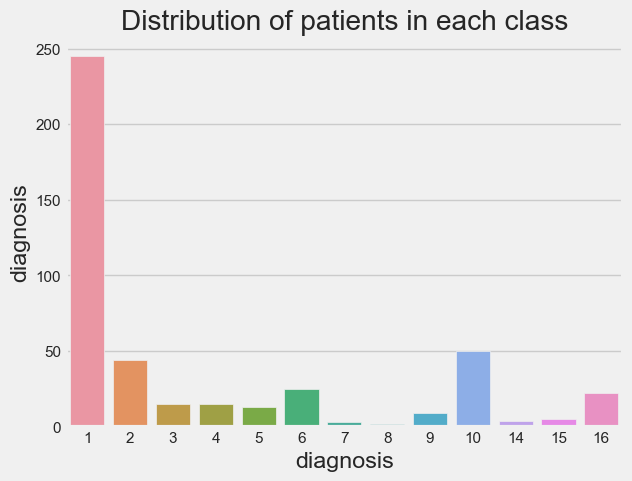

In [32]:
#identify the target
df.rename(columns={280:'diagnosis'},inplace=True)
sns.barplot(data=df,x='diagnosis',y='diagnosis', estimator = len)
plt.title('Distribution of patients in each class')
plt.show()

In [33]:
df.drop(["S\'_wave(ms)","CB","CD","CS","EV","EY","FF","FH","FJ","FL","FS","FZ","GA","S'_wave(mv)","IB","KP","LC",
         "AA","AB", "AC", "AD","AE", "AF", "AG","AH","AI","AJ","AK","AL", "AM","AN", "AO", "AP", "AR", "AS", "AT","AU", "AV",  "AY",  "AZ", "BA", "BB","BC", "BD", "BE", "BF","BG", "BH","BI", "BJ", "BK", "BL", "BM", "BN",   "BO","BP", "BR", "BS", "BT", "BU","BV","BY","BZ", "CA", "CC", "CE", "CF", "CG", "CH", "CI", "CJ","CK","CL","CM","CN","CO","CP","CR",   "CT","CU","CV","CY","CZ","DA","DB","DC","DD","DE","DF","DG","DH","DI","DJ","DK","DL","DM","DN","DO","DP","DR","DS","DT","DU","DV","DY","DZ","EA","EB","EC","ED","EF","EG","EH","EI","EJ","EK", "EL","EM","EM","EN","EO","EP", "ER","ES", "ET", "EU",

         "EZ", "FA","FB","FC","FD", "FE",    "FG",    "FI",    "FK",    "FM","FN","FO","FP", "FR",    "FT", "FU", "FV", "FY",     "GB",   "GM","GN","GO","GP",   "GR","GS","GT","GU","GV",    "GY","GZ","HA","HB","HC","HD", "HE","HF","HG","HH","HI","HJ","HK","HL","HM","HN","HO","HP","HR","HS","HT","HU","HV","HY","HZ","IA","IC","ID","IE","IF","IG","IH","II","IJ","IK","IL", "IM","IN","IO","IP","IR","IS","IT","IU","IV", "IY","IZ", "JA","JB","JC","JD","JE","JF","JG","JH","JI","JJ", "JK", "JL","JM","JN","JO","JP","JR","JS","JT","JU","JV","JY","JZ", "KA","KB","KC","KD","KE","KF","KG","KH","KI","KJ","KK","KL","KM","KN", "KO", "KR","KS","KT","KU","KV","KY","KZ", "LA","LB", "LC","LD","LE","LF","LG"
         ], axis=1, inplace=True)#axis=1指定删除的是列而不是行，inplace=True指定对原始DataFrame进行更改，而不是返回一个修改后的副本。

In [34]:
df.head(177)

,age,sex,height,weight,qrs_duration(ms),p-r_interval(ms),q-t_interval,t_interval,p_interval,qrs,T,P,QRST(ms),J,heart_rate(bpm),q_wave(ms),r_wave(ms),s_wave(ms),R'_wave(ms),JJ_wave(mv),Q_wave(mv),R_wave(mv),S_wave(mv),R'_wave(mv),P_wave(mv),T_wave(mv),QRSA(mvs),QRSTA(mvs),diagnosis
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,-1,63,0,52,44,0,-0.2,0.0,6.1,-1.0,0.0,0.6,2.1,13.6,30.8,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,-1,53,0,48,0,0,-0.6,0.0,7.2,0.0,0.0,0.4,1.5,17.2,26.5,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,0,40,80,0,1.0,0.0,4.5,-2.8,0.0,0.3,2.5,-2.2,19.8,10
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,-1,71,0,72,20,0,0.9,0.0,7.8,-0.7,0.0,1.1,1.9,27.3,45.1,1
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,-1,-1,0,48,40,0,0.0,0.0,5.2,-1.4,0.0,0.9,2.3,9.6,31.6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,32,1,163,65,100,145,377,152,101,28,68,69,52,-1,72,0,56,32,0,0.0,0.0,5.1,-0.5,0.0,0.4,1.2,13.4,22.0,1
173,56,0,168,76,90,157,378,144,88,29,66,27,39,-1,75,24,44,0,0,-0.3,-1.1,10.6,0.0,0.0,0.5,0.6,22.0,25.8,10
174,55,1,156,78,88,0,380,138,0,79,73,-1,76,-108,71,0,44,44,0,-0.1,0.0,4.6,-2.6,0.0,0.3,0.5,4.4,7.7,15
175,54,1,160,64,71,148,409,139,93,-5,14,-11,2,-121,56,0,60,0,0,-0.1,0.0,6.0,0.0,0.0,0.9,1.6,18.0,27.6,6


Further investigating the data have revealed there are some odd entries for the entries that are made presumably for babies which is handled manually. https://www.kaggle.com/mtavares51/binary-classification-on-arrhythmia-dataset

In [35]:
df['height'].value_counts().sort_index()

105     1
110     1
119     1
120     2
124     1
127     1
130     2
132     1
133     1
138     1
140     1
146     1
148     1
149     1
150     9
152     1
153     5
154     4
155    23
156    19
157    10
158     9
159     6
160    81
161     5
162    15
163    16
164     9
165    46
166     9
167     8
168    15
169     7
170    40
171     9
172    14
173     7
174     4
175    21
176    10
177     4
178     9
179     1
180     4
181     1
182     2
184     1
185     3
186     3
188     1
190     3
608     1
780     1
Name: height, dtype: int64

In [36]:
df.loc[df["height"] == 608, "height"] = 61
df.loc[df["height"] == 780, "height"] = 78
df['height'].value_counts().sort_index()

61      1
78      1
105     1
110     1
119     1
120     2
124     1
127     1
130     2
132     1
133     1
138     1
140     1
146     1
148     1
149     1
150     9
152     1
153     5
154     4
155    23
156    19
157    10
158     9
159     6
160    81
161     5
162    15
163    16
164     9
165    46
166     9
167     8
168    15
169     7
170    40
171     9
172    14
173     7
174     4
175    21
176    10
177     4
178     9
179     1
180     4
181     1
182     2
184     1
185     3
186     3
188     1
190     3
Name: height, dtype: int64

In [37]:
print(df.columns.tolist())

['age', 'sex', 'height', 'weight', 'qrs_duration(ms)', 'p-r_interval(ms)', 'q-t_interval', 't_interval', 'p_interval', 'qrs', 'T', 'P', 'QRST(ms)', 'J', 'heart_rate(bpm)', 'q_wave(ms)', 'r_wave(ms)', 's_wave(ms)', "R'_wave(ms)", 'JJ_wave(mv)', 'Q_wave(mv)', 'R_wave(mv)', 'S_wave(mv)', "R'_wave(mv)", 'P_wave(mv)', 'T_wave(mv)', 'QRSA(mvs)', 'QRSTA(mvs)', 'diagnosis']


In [38]:
norm_risk_list = []
for diagnose in df.diagnosis:
    if diagnose == 1:
        norm_risk_list.append(True)
    else:
        norm_risk_list.append(False)
df["label"] = np.array(norm_risk_list)
df.drop(columns = ["diagnosis"],inplace = True)
df.label.value_counts()

True     245
False    207
Name: label, dtype: int64

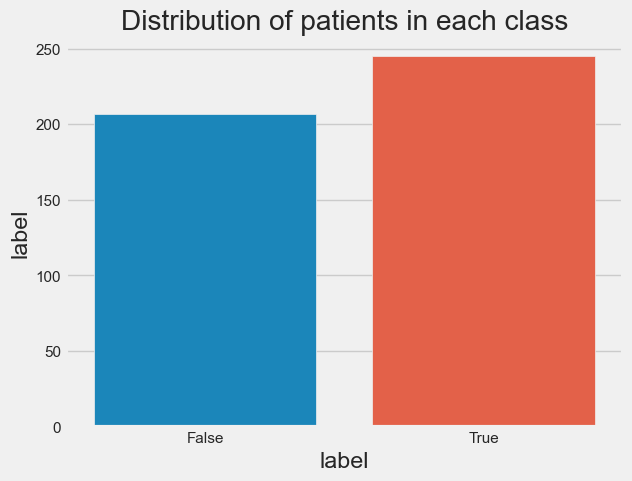

In [39]:
df_binary=df.copy()
sns.barplot(data=df_binary,x='label',y='label', estimator = len)
plt.title('Distribution of patients in each class')
plt.show()

AttributeError: 'bool' object has no attribute 'all'

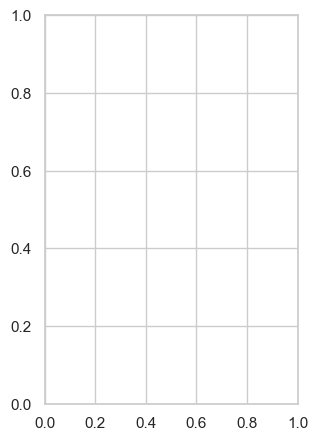

In [40]:
#Relation between Age/Class:
sns.set(style="whitegrid")#画布样式为白色网格
plt.subplot(1,2,1)#该画布有1行2列，最后的1表示该子图在第一列
sns.barplot(data=df_binary,x=df_binary['label'].astype(int),y=0)#以Label列作为横轴，以0列作为纵轴，绘制柱状图。

X is formed by importing every data at first. All the dimensionality reduction will be applied afterwards. Y is the label column.

In [ ]:
X = df.drop(columns = [df.columns[-1]])
y = df[df.columns[-1]]
print(X.shape)
print(y.shape)
print(np.ndim(y))

A train test split have been implemented with 0.2 test_size value.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

For every column, a MinMaxScaler have been implemented

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = X_train_scaled
X_test = X_test_scaled

In [ ]:
print(X_train[:10])#打印前10行

In [ ]:
# Extract the ECG signals of the first patient (274 features)
ecg_signals = df.iloc[25, 5:].values.astype(float)

# Define the time axis
fs = 360  # Sampling frequency
t = np.arange(len(ecg_signals)) / fs

# Plot the ECG signal
plt.plot(t, ecg_signals)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.title('ECG of Patient 1')
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# create KNN classifier
knn = KNeighborsClassifier(
        n_neighbors=45,
        weights="uniform",
        algorithm="auto",
        leaf_size=50,                       #较大的leaf_size值将使构建树更快，但可能会增加内存使用。
        p=5,                                #值为2对应欧几里得距离，值为1对应曼哈顿距离,8是切比雪夫距离。
        metric="minkowski",
        metric_params=None,
        n_jobs=None
)
knn.fit(X_train, y_train)

# predict on test data
y_predknn = knn.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score
# 计算准确率
accknn = accuracy_score(y_test, y_predknn)
print('KNN_Accuracy:', accknn)
from sklearn.metrics import precision_recall_fscore_support
# Precision, Recall, F1 Score, Support
prfsknn = precision_recall_fscore_support(y_test, y_predknn)
print("Precision:", prfsknn[0][1])
print("Recall:", prfsknn[1][1])
print("F1 Score:", prfsknn[2][1])
print("Support:", prfsknn[3][1])

# create confusion matrix
conf_matknn = confusion_matrix(y_test, y_predknn)
# print('Confusion matrix:', conf_mat)
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(4,4))
ax = sns.heatmap(conf_matknn, annot=True, fmt='d',
            xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# predict probability of each class
y_pred_proba = knn.predict_proba(X_test)[::,-1]#选择测试数据集最后一列的所有元素
# compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_aucknn = auc(fpr, tpr)
aucknn = roc_auc_score(y_test, y_predknn)
print("AUC score: ", aucknn)
# plot ROC curve
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_aucknn)
plt.title('KNN_ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')